In [1]:
#import the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("E:/Users/NM/envs/ds/solar/SolarPrediction.csv/SolarPrediction.csv")#load the dataset

In [3]:
data.head()#print the first five rows of dataset

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
data.shape#print the shape of dataset

(32686, 11)

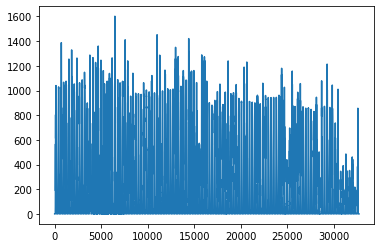

In [5]:
plt.plot(data["Radiation"])
plt.show()#plot the Radiation column

In [6]:
data.describe()#describe the dataset

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [7]:
data.isnull().sum()#check for the null value in dataset

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [8]:
data_v=data.copy()#copy the dataset to another variable to make the changes comfortably
data_v.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [9]:
# data_v['Time_conv'] =  pd.to_datetime(data_v['Time'], format='%H:%M:%S')
data_v['hour'] = pd.to_datetime(data_v['Time'], format='%H:%M:%S').dt.hour

#Add column 'month'
data_v['month'] = pd.to_datetime(data_v['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
data_v['year'] = pd.to_datetime(data_v['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
data_v['total_time'] = pd.to_datetime(data_v['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(data_v['TimeSunRise'], format='%H:%M:%S').dt.hour



In [10]:
data_v.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,hour,month,year,total_time
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,23,9,2016,12
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,23,9,2016,12
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,23,9,2016,12
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,23,9,2016,12
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,23,9,2016,12


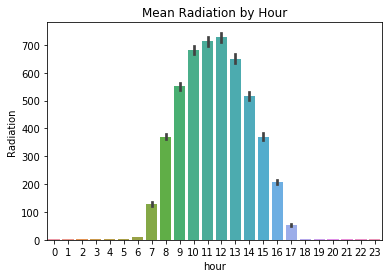

In [11]:
sns.barplot(x="hour", y='Radiation', data=data_v)#plot the mean Radiation against the hour
plt.title('Mean Radiation by Hour')
plt.show()

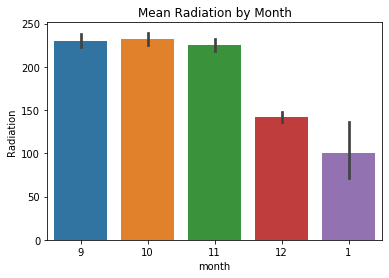

In [12]:
sns.barplot(x="month", y='Radiation', data=data_v,order=[9,10,11,12,1])#plot the mean radiation against the month
plt.title('Mean Radiation by Month')
plt.show()

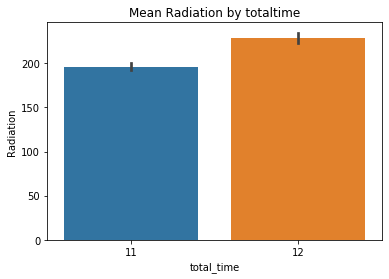

In [13]:
sns.barplot(x="total_time", y='Radiation', data=data_v)#plot the mean radiation against the total time of radiation in the day.
plt.title('Mean Radiation by totaltime')
plt.show()

In [14]:
data.head()#print the head

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [15]:
final_data=data.drop(["UNIXTime","Data","Time","TimeSunRise","TimeSunSet","Radiation"],axis=1)#drop the columns not require for training

In [16]:
final_data#print the training data

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,48,30.46,59,177.39,5.62
1,48,30.46,58,176.78,3.37
2,48,30.46,57,158.75,3.37
3,48,30.46,60,137.71,3.37
4,48,30.46,62,104.95,5.62
5,48,30.46,64,120.20,5.62
6,49,30.46,72,112.45,6.75
7,49,30.46,71,122.97,5.62
8,49,30.46,80,101.18,4.50
9,49,30.46,85,141.87,4.50


In [17]:
target=data.drop(["UNIXTime","Data","Time","TimeSunRise","TimeSunSet","Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"],axis=1)
#drop the columns to get the predicting column or data

In [18]:
target

,Radiation
0,1.21
1,1.21
2,1.23
3,1.21
4,1.17
5,1.21
6,1.20
7,1.24
8,1.23
9,1.21


In [22]:
from sklearn.datasets import load_boston#import the module needed for prediction model
from sklearn.model_selection import train_test_split
import numpy as np
# import tests2 as t

y = target
X = final_data

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

In [23]:
#import the regression models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [24]:
#initialize the imported model to variable
tree_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor()
ada_mod = AdaBoostRegressor()
reg_mod = LinearRegression()

In [25]:
#fit the training data for training
tree_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
ada_mod.fit(X_train, y_train)
reg_mod.fit(X_train, y_train)

e:\users\nm\envs\ds\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
e:\users\nm\envs\ds\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
e:\users\nm\envs\ds\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#predict the data using testing data
preds_tree = tree_mod.predict(X_test)
preds_rf = rf_mod.predict(X_test)
preds_ada = ada_mod.predict(X_test)
preds_reg = reg_mod.predict(X_test)

In [27]:
#import module for evaluating the data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [30]:
print(r2_score(y_test, preds_tree))

0.5004575009695355


In [32]:
print(mean_squared_error(y_test, preds_tree))

49699.903850360904


In [33]:
print(mean_absolute_error(y_test, preds_tree))

111.75441086493


In [40]:
#evaluating data for all the regression method
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the mse, mae, r2
    '''
    if model_name == None:
        print('Mean Squared Error: ', format(mean_squared_error(y_true, preds)))
        print('Mean Absolute Error: ', format(mean_absolute_error(y_true, preds)))
        print('R2 Score: ', format(r2_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Mean Absolute Error ' + model_name + ' :', format(mean_absolute_error(y_true, preds)))
        print('R2 Score ' + model_name + ' :', format(r2_score(y_true, preds)))
        print('\n\n')

In [41]:
print_metrics(y_test, preds_tree, 'tree')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Linear Regression scores
print_metrics(y_test, preds_reg, 'linear reg')

Mean Absolute Error tree : 111.75441086493
R2 Score tree : 0.5004575009695355



Mean Absolute Error random forest : 95.55578871525249
R2 Score random forest : 0.7136836807051135



Mean Absolute Error adaboost : 187.54668154940282
R2 Score adaboost : 0.46128784934385725



Mean Absolute Error linear reg : 158.83371079362132
R2 Score linear reg : 0.5591909560686436



